## Linear Regression

In [3]:
import pandas as pd

file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/insurance.csv'
data  = pd.read_csv(file_url)

## 데이터 확인

In [4]:
data

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350
1336,21,0,25.800,0,0,2007.94500


In [5]:
data.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 62.8 KB


In [7]:
data.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


In [5]:
round(data.describe(), 2)

,age,sex,bmi,children,smoker,charges
count,1338.00,1338.00,1338.00,1338.00,1338.0,1338.00
mean,39.21,0.51,30.66,1.09,0.2,13270.42
std,14.05,0.50,6.10,1.21,0.4,12110.01
min,18.00,0.00,15.96,0.00,0.0,1121.87
25%,27.00,0.00,26.30,0.00,0.0,4740.29
50%,39.00,1.00,30.40,1.00,0.0,9382.03
75%,51.00,1.00,34.69,2.00,0.0,16639.91
max,64.00,1.00,53.13,5.00,1.0,63770.43


## 전처리: 학습셋과 실험셋 나누기

In [6]:
X = data[['age', 'sex', 'bmi', 'children', 'smoker']]
y = data['charges']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=100)

## 모델링

In [7]:
from sklearn.linear_model import LinearRegression

# model이란 객체에 linear regression 속성 부여
model = LinearRegression()
# 학습 시작
model.fit(X_train, y_train)

LinearRegression()

## 모델을 활용해 예측하기

In [8]:
pred = model.predict(X_test)

## 예측 모델 평가하기

In [9]:
comparison = pd.DataFrame({'actual': y_test, 'pred': pred})

In [10]:
comparison

,actual,pred
12,1826.84300,4765.249466
306,20177.67113,4957.730865
318,7421.19455,8298.988153
815,1877.92940,3078.811868
157,15518.18025,24165.956542
...,...,...
713,1984.45330,5776.764928
1282,14283.45940,23102.847340
531,14043.47670,14280.732585
537,8825.08600,10527.417291


In [18]:
import matplotlib.pyplot as plt  # ❶
import seaborn as sns  # ❷

<AxesSubplot: xlabel='actual', ylabel='pred'>

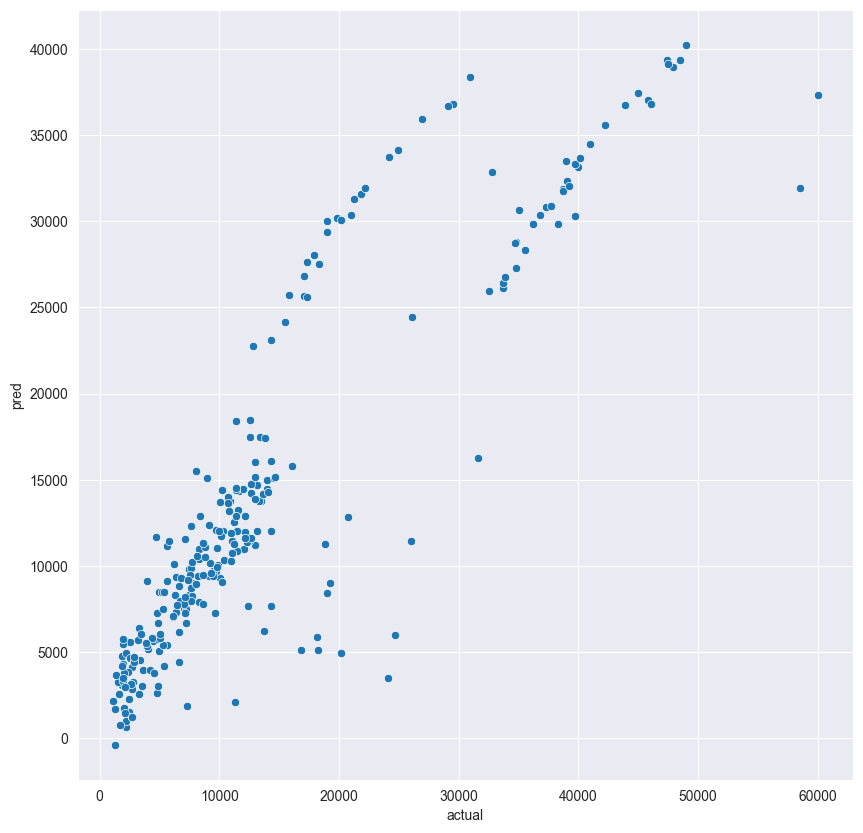

In [19]:
plt.figure(figsize=(10,10))  # ❶ 그래프 크기를 정의
sns.scatterplot(x='actual', y='pred', data=comparison)  # ❷

In [20]:
from sklearn.metrics import mean_squared_error # ❶
mean_squared_error(y_test, pred) ** 0.5 # ❷

5684.927776334484

In [21]:
mean_squared_error(y_test, pred, squared = False)

5684.927776334484

In [22]:
model.score(X_train, y_train)

0.7368220127747351

## 4.8 이해하기 : 선형 회귀 (Linear Regression)

In [23]:
model.coef_

array([2.64799803e+02, 1.73446608e+01, 2.97514806e+02, 4.69339602e+02,
       2.34692802e+04])

In [24]:
pd.Series(model.coef_, index = X.columns)

age           264.799803
sex            17.344661
bmi           297.514806
children      469.339602
smoker      23469.280173
dtype: float64

In [25]:
model.intercept_

-11576.99997611237